# Dataset: Colorectal Cancer Gene Expression Data

The gene expression levels of colorectal cancer patients (n=62) are stored in a CSV file, covering 1935 genes. These values have been pre-processed and log2 transformed.

I start by checking the data's shape, columns, and types, and clean up unnecessary parts. Since the original DataFrame has gene IDs as rows and patient IDs as columns, I transpose it. The plan is to merge it with patient data for further analysis. Additionally, all gene expression data starts as Numpy objects, so I convert it to float numbers. Next, I explore the data to understand its structure and patterns using descriptive stats and visualizations.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 1. Gene Expression Data Preparation

In [2]:
df_GeneEx = pd.read_csv('GeneExpression_Data_ColorectalCancer.csv')
df_GeneEx

,Unnamed: 0,ID_REF,GSM877126,GSM877127,GSM877128,GSM877129,GSM877130,GSM877131,GSM877132,GSM877133,...,GSM877179,GSM877180,GSM877181,GSM877182,GSM877183,GSM877184,GSM877185,GSM877186,GSM877187,GSM877188
0,0,117_at,6.029834,6.344321,5.023127,4.612727,5.865944,6.863884,5.430316,4.285183,...,5.111097,4.894901,6.660386,5.407188,7.228848,4.835558,5.694010,8.661629,5.702601,4.500368
1,1,1007_s_at,9.468893,9.994204,10.409823,10.596921,10.252547,9.671754,10.863276,9.788300,...,10.084649,10.353849,10.584126,10.585953,9.579042,10.343581,9.409749,10.427298,10.309094,10.996956
2,2,1053_at,7.187090,7.705626,7.934057,7.446374,7.141105,7.040535,7.767728,8.035921,...,6.119306,7.320403,7.326724,7.776103,8.273184,7.471584,7.488735,7.512632,7.476872,7.453162
3,3,121_at,6.807582,6.893130,7.165602,7.071417,7.103383,7.504727,7.067674,7.259019,...,7.267976,7.556417,6.950901,6.898353,7.240276,7.920227,6.699796,7.046389,7.349701,8.031972
4,4,1255_g_at,3.084591,3.118704,2.984632,2.912851,3.383726,2.772535,3.037304,2.986420,...,2.741116,3.054084,3.186402,2.881039,2.754190,2.888331,3.201511,2.650723,2.858642,2.787537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1930,1930,1554918_a_at,4.009692,4.679732,4.781843,3.653575,4.666360,3.821213,3.976654,4.009738,...,4.470400,5.307492,4.061537,3.541660,4.134965,4.103411,4.724017,6.897634,4.883845,4.328188
1931,1931,1554919_s_at,4.350400,4.508760,4.435054,5.014994,5.013006,4.685555,4.473672,4.673572,...,4.902737,4.681975,4.549951,4.632055,4.435984,4.303329,4.470426,3.797626,4.661893,4.682695
1932,1932,1554920_at,2.512026,2.427697,2.531300,2.608755,2.657130,2.683305,2.764213,2.526576,...,2.649442,2.473462,2.572779,2.712954,2.709632,2.422700,2.634358,2.756086,2.581452,2.529767
1933,1933,213418_at,7.494499,8.156995,6.058687,5.488072,7.410725,8.421115,6.790053,5.367715,...,7.005759,5.714525,8.285216,6.852151,8.860541,6.072618,7.175365,10.121831,7.232090,5.566607


In [3]:
# remove empty columns
df_GeneEx = df_GeneEx.drop('Unnamed: 0', axis=1)
df_GeneEx

,ID_REF,GSM877126,GSM877127,GSM877128,GSM877129,GSM877130,GSM877131,GSM877132,GSM877133,GSM877134,...,GSM877179,GSM877180,GSM877181,GSM877182,GSM877183,GSM877184,GSM877185,GSM877186,GSM877187,GSM877188
0,117_at,6.029834,6.344321,5.023127,4.612727,5.865944,6.863884,5.430316,4.285183,4.903302,...,5.111097,4.894901,6.660386,5.407188,7.228848,4.835558,5.694010,8.661629,5.702601,4.500368
1,1007_s_at,9.468893,9.994204,10.409823,10.596921,10.252547,9.671754,10.863276,9.788300,10.551750,...,10.084649,10.353849,10.584126,10.585953,9.579042,10.343581,9.409749,10.427298,10.309094,10.996956
2,1053_at,7.187090,7.705626,7.934057,7.446374,7.141105,7.040535,7.767728,8.035921,7.869727,...,6.119306,7.320403,7.326724,7.776103,8.273184,7.471584,7.488735,7.512632,7.476872,7.453162
3,121_at,6.807582,6.893130,7.165602,7.071417,7.103383,7.504727,7.067674,7.259019,7.462846,...,7.267976,7.556417,6.950901,6.898353,7.240276,7.920227,6.699796,7.046389,7.349701,8.031972
4,1255_g_at,3.084591,3.118704,2.984632,2.912851,3.383726,2.772535,3.037304,2.986420,3.066619,...,2.741116,3.054084,3.186402,2.881039,2.754190,2.888331,3.201511,2.650723,2.858642,2.787537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1930,1554918_a_at,4.009692,4.679732,4.781843,3.653575,4.666360,3.821213,3.976654,4.009738,4.148965,...,4.470400,5.307492,4.061537,3.541660,4.134965,4.103411,4.724017,6.897634,4.883845,4.328188
1931,1554919_s_at,4.350400,4.508760,4.435054,5.014994,5.013006,4.685555,4.473672,4.673572,4.655666,...,4.902737,4.681975,4.549951,4.632055,4.435984,4.303329,4.470426,3.797626,4.661893,4.682695
1932,1554920_at,2.512026,2.427697,2.531300,2.608755,2.657130,2.683305,2.764213,2.526576,2.407719,...,2.649442,2.473462,2.572779,2.712954,2.709632,2.422700,2.634358,2.756086,2.581452,2.529767
1933,213418_at,7.494499,8.156995,6.058687,5.488072,7.410725,8.421115,6.790053,5.367715,6.392214,...,7.005759,5.714525,8.285216,6.852151,8.860541,6.072618,7.175365,10.121831,7.232090,5.566607


In [4]:
# Transpose df_GeneEx table

df_GeneEx = np.transpose(df_GeneEx)
df_GeneEx

,0,1,2,3,4,5,6,7,8,9,...,1925,1926,1927,1928,1929,1930,1931,1932,1933,1934
ID_REF,117_at,1007_s_at,1053_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,1554911_at,1554912_at,1554914_at,1554915_a_at,1554916_a_at,1554918_a_at,1554919_s_at,1554920_at,213418_at,1554921_a_at
GSM877126,6.029834,9.468893,7.18709,6.807582,3.084591,7.397013,6.525426,3.848253,7.572331,3.7482,...,3.504809,2.856109,3.130712,5.603126,3.091348,4.009692,4.3504,2.512026,7.494499,4.030978
GSM877127,6.344321,9.994204,7.705626,6.89313,3.118704,7.163797,6.391195,4.202085,8.295322,3.11434,...,3.957833,2.988643,3.484177,6.601744,3.141737,4.679732,4.50876,2.427697,8.156995,2.82709
GSM877128,5.023127,10.409823,7.934057,7.165602,2.984632,7.375224,5.538846,4.074462,7.055579,4.17227,...,3.749518,2.61084,3.406207,6.003205,3.469987,4.781843,4.435054,2.5313,6.058687,2.930454
GSM877129,4.612727,10.596921,7.446374,7.071417,2.912851,7.596233,5.989148,3.738205,9.683806,3.625413,...,3.610429,2.728274,3.534871,5.858326,3.372291,3.653575,5.014994,2.608755,5.488072,2.949848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM877184,4.835558,10.343581,7.471584,7.920227,2.888331,7.628249,6.061266,3.728707,7.830382,3.161023,...,3.637413,2.787781,3.519436,6.026848,3.404074,4.103411,4.303329,2.4227,6.072618,2.853109
GSM877185,5.69401,9.409749,7.488735,6.699796,3.201511,7.192814,5.928451,3.675157,7.271917,3.392471,...,3.733335,3.473473,3.237316,6.167214,3.452096,4.724017,4.470426,2.634358,7.175365,2.667533
GSM877186,8.661629,10.427298,7.512632,7.046389,2.650723,5.992824,5.285014,4.047409,5.335867,3.381974,...,3.436002,2.706722,3.349033,6.238026,3.109042,6.897634,3.797626,2.756086,10.121831,2.971542
GSM877187,5.702601,10.309094,7.476872,7.349701,2.858642,6.878941,6.137371,3.863878,8.280592,3.222998,...,3.43826,2.539084,3.33459,5.842051,3.496104,4.883845,4.661893,2.581452,7.23209,2.719928


In [5]:
#Extract the column names from the first row of the DataFrame and assign them as column headers
column_names = df_GeneEx.iloc[0].tolist()
df_GeneEx.columns = column_names
df_GeneEx.head(5)

,117_at,1007_s_at,1053_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,1554911_at,1554912_at,1554914_at,1554915_a_at,1554916_a_at,1554918_a_at,1554919_s_at,1554920_at,213418_at,1554921_a_at
ID_REF,117_at,1007_s_at,1053_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,1554911_at,1554912_at,1554914_at,1554915_a_at,1554916_a_at,1554918_a_at,1554919_s_at,1554920_at,213418_at,1554921_a_at
GSM877126,6.029834,9.468893,7.18709,6.807582,3.084591,7.397013,6.525426,3.848253,7.572331,3.7482,...,3.504809,2.856109,3.130712,5.603126,3.091348,4.009692,4.3504,2.512026,7.494499,4.030978
GSM877127,6.344321,9.994204,7.705626,6.89313,3.118704,7.163797,6.391195,4.202085,8.295322,3.11434,...,3.957833,2.988643,3.484177,6.601744,3.141737,4.679732,4.50876,2.427697,8.156995,2.82709
GSM877128,5.023127,10.409823,7.934057,7.165602,2.984632,7.375224,5.538846,4.074462,7.055579,4.17227,...,3.749518,2.61084,3.406207,6.003205,3.469987,4.781843,4.435054,2.5313,6.058687,2.930454
GSM877129,4.612727,10.596921,7.446374,7.071417,2.912851,7.596233,5.989148,3.738205,9.683806,3.625413,...,3.610429,2.728274,3.534871,5.858326,3.372291,3.653575,5.014994,2.608755,5.488072,2.949848


In [6]:
#Remove the redundant first row with the index 'ID_REF' from the DataFrame
df_GeneEx = df_GeneEx.drop(index='ID_REF', axis=0)
df_GeneEx.head(5)

,117_at,1007_s_at,1053_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,1554911_at,1554912_at,1554914_at,1554915_a_at,1554916_a_at,1554918_a_at,1554919_s_at,1554920_at,213418_at,1554921_a_at
GSM877126,6.029834,9.468893,7.18709,6.807582,3.084591,7.397013,6.525426,3.848253,7.572331,3.7482,...,3.504809,2.856109,3.130712,5.603126,3.091348,4.009692,4.3504,2.512026,7.494499,4.030978
GSM877127,6.344321,9.994204,7.705626,6.89313,3.118704,7.163797,6.391195,4.202085,8.295322,3.11434,...,3.957833,2.988643,3.484177,6.601744,3.141737,4.679732,4.50876,2.427697,8.156995,2.82709
GSM877128,5.023127,10.409823,7.934057,7.165602,2.984632,7.375224,5.538846,4.074462,7.055579,4.17227,...,3.749518,2.61084,3.406207,6.003205,3.469987,4.781843,4.435054,2.5313,6.058687,2.930454
GSM877129,4.612727,10.596921,7.446374,7.071417,2.912851,7.596233,5.989148,3.738205,9.683806,3.625413,...,3.610429,2.728274,3.534871,5.858326,3.372291,3.653575,5.014994,2.608755,5.488072,2.949848
GSM877130,5.865944,10.252547,7.141105,7.103383,3.383726,7.278244,5.678236,4.141955,7.360892,3.338311,...,3.520434,2.664744,3.314746,5.388115,3.322147,4.66636,5.013006,2.65713,7.410725,3.054697


In [7]:
#Insert new column at position 0 and new column name is 'ID_REF'
df_GeneEx.insert(loc=0, column='ID_REF', value=df_GeneEx.index)
df_GeneEx.head(5)

,ID_REF,117_at,1007_s_at,1053_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,1554911_at,1554912_at,1554914_at,1554915_a_at,1554916_a_at,1554918_a_at,1554919_s_at,1554920_at,213418_at,1554921_a_at
GSM877126,GSM877126,6.029834,9.468893,7.18709,6.807582,3.084591,7.397013,6.525426,3.848253,7.572331,...,3.504809,2.856109,3.130712,5.603126,3.091348,4.009692,4.3504,2.512026,7.494499,4.030978
GSM877127,GSM877127,6.344321,9.994204,7.705626,6.89313,3.118704,7.163797,6.391195,4.202085,8.295322,...,3.957833,2.988643,3.484177,6.601744,3.141737,4.679732,4.50876,2.427697,8.156995,2.82709
GSM877128,GSM877128,5.023127,10.409823,7.934057,7.165602,2.984632,7.375224,5.538846,4.074462,7.055579,...,3.749518,2.61084,3.406207,6.003205,3.469987,4.781843,4.435054,2.5313,6.058687,2.930454
GSM877129,GSM877129,4.612727,10.596921,7.446374,7.071417,2.912851,7.596233,5.989148,3.738205,9.683806,...,3.610429,2.728274,3.534871,5.858326,3.372291,3.653575,5.014994,2.608755,5.488072,2.949848
GSM877130,GSM877130,5.865944,10.252547,7.141105,7.103383,3.383726,7.278244,5.678236,4.141955,7.360892,...,3.520434,2.664744,3.314746,5.388115,3.322147,4.66636,5.013006,2.65713,7.410725,3.054697


In [8]:
#Exclude the first column by position
df_GeneEx = df_GeneEx.reset_index(drop=True)
df_GeneEx.head(5)

,ID_REF,117_at,1007_s_at,1053_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,1554911_at,1554912_at,1554914_at,1554915_a_at,1554916_a_at,1554918_a_at,1554919_s_at,1554920_at,213418_at,1554921_a_at
0,GSM877126,6.029834,9.468893,7.18709,6.807582,3.084591,7.397013,6.525426,3.848253,7.572331,...,3.504809,2.856109,3.130712,5.603126,3.091348,4.009692,4.3504,2.512026,7.494499,4.030978
1,GSM877127,6.344321,9.994204,7.705626,6.89313,3.118704,7.163797,6.391195,4.202085,8.295322,...,3.957833,2.988643,3.484177,6.601744,3.141737,4.679732,4.50876,2.427697,8.156995,2.82709
2,GSM877128,5.023127,10.409823,7.934057,7.165602,2.984632,7.375224,5.538846,4.074462,7.055579,...,3.749518,2.61084,3.406207,6.003205,3.469987,4.781843,4.435054,2.5313,6.058687,2.930454
3,GSM877129,4.612727,10.596921,7.446374,7.071417,2.912851,7.596233,5.989148,3.738205,9.683806,...,3.610429,2.728274,3.534871,5.858326,3.372291,3.653575,5.014994,2.608755,5.488072,2.949848
4,GSM877130,5.865944,10.252547,7.141105,7.103383,3.383726,7.278244,5.678236,4.141955,7.360892,...,3.520434,2.664744,3.314746,5.388115,3.322147,4.66636,5.013006,2.65713,7.410725,3.054697


In [9]:
df_GeneEx['117_at'].dtype

dtype('O')

In [10]:
#we need to change the gene expression value from object type ('O') to float (number)
#select the column that we want to convert to float
#convert all object

geneEx_columns = df_GeneEx.columns.to_list()[1:]
df_GeneEx[geneEx_columns] = df_GeneEx[geneEx_columns].astype('float')
df_GeneEx.head(5)

,ID_REF,117_at,1007_s_at,1053_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,1554911_at,1554912_at,1554914_at,1554915_a_at,1554916_a_at,1554918_a_at,1554919_s_at,1554920_at,213418_at,1554921_a_at
0,GSM877126,6.029834,9.468893,7.187090,6.807582,3.084591,7.397013,6.525426,3.848253,7.572331,...,3.504809,2.856109,3.130712,5.603126,3.091348,4.009692,4.350400,2.512026,7.494499,4.030978
1,GSM877127,6.344321,9.994204,7.705626,6.893130,3.118704,7.163797,6.391195,4.202085,8.295322,...,3.957833,2.988643,3.484177,6.601744,3.141737,4.679732,4.508760,2.427697,8.156995,2.827090
2,GSM877128,5.023127,10.409823,7.934057,7.165602,2.984632,7.375224,5.538846,4.074462,7.055579,...,3.749518,2.610840,3.406207,6.003205,3.469987,4.781843,4.435054,2.531300,6.058687,2.930454
3,GSM877129,4.612727,10.596921,7.446374,7.071417,2.912851,7.596233,5.989148,3.738205,9.683806,...,3.610429,2.728274,3.534871,5.858326,3.372291,3.653575,5.014994,2.608755,5.488072,2.949848
4,GSM877130,5.865944,10.252547,7.141105,7.103383,3.383726,7.278244,5.678236,4.141955,7.360892,...,3.520434,2.664744,3.314746,5.388115,3.322147,4.666360,5.013006,2.657130,7.410725,3.054697


In [11]:
#check that all columns of the dataframe contain numeric data type (except column 0 which is ID REF)
#There is no AssertionError:,it means that all data types in the specified columns of df_GeneEx are subtypes of the NumPy number type

assert all([np.issubdtype(x, np.number) for x in df_GeneEx.iloc[:, 1:].dtypes])

In [12]:
#confirm that gene expression value is now float
df_GeneEx['117_at'].dtype

dtype('float64')

In [13]:
#save df_GeneEx to new file
df_GeneEx.to_csv('df_GeneEx_working', index=False)

## 2. Exploratory Data Analysis 

Using descriptive statistics to observe the maximum and minimum values across the dataset and also sorting the 
highest and lowest means of the data.

Univariate analysis is perfomed to Visualize the distribution of gene expression for a few representative genes.

In [14]:
# Checking for missing values
missing_values = df_GeneEx.isnull().sum()
columns_with_missing_values = missing_values[missing_values > 0]
print(columns_with_missing_values)

Series([], dtype: int64)


In [15]:
#generate descriptive statistic
df_GeneEx.describe()

,117_at,1007_s_at,1053_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,1554911_at,1554912_at,1554914_at,1554915_a_at,1554916_a_at,1554918_a_at,1554919_s_at,1554920_at,213418_at,1554921_a_at
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,5.707784,10.220618,7.533482,7.331769,2.982030,7.279824,5.982484,3.885063,7.737473,3.460415,...,3.722569,2.697402,3.445108,5.849156,3.437122,4.319765,4.530284,2.580418,7.007763,2.886002
std,1.141096,0.506397,0.448784,0.346860,0.181438,0.526905,0.353695,0.185737,1.364183,0.287547,...,0.194573,0.191073,0.182877,0.466693,0.267659,0.648902,0.329638,0.107296,1.362131,0.274488
min,4.285183,7.754544,6.119306,6.699796,2.650723,5.992824,5.285014,3.499041,4.685060,3.114340,...,3.251912,2.397467,2.994022,4.711967,2.709493,3.168259,3.668514,2.329777,4.983739,2.596916
25%,4.917209,10.010747,7.306200,7.077712,2.860146,7.007140,5.738839,3.742372,7.057896,3.306567,...,3.613045,2.571041,3.323543,5.539251,3.289856,3.894832,4.373952,2.515328,5.864103,2.733037
50%,5.363241,10.239241,7.500395,7.263498,2.956179,7.231809,5.989217,3.858752,7.652836,3.391923,...,3.720273,2.677127,3.438560,5.863188,3.399116,4.205774,4.543968,2.581821,6.831109,2.844452
75%,6.261369,10.545181,7.763559,7.545533,3.070789,7.566110,6.271426,4.020531,8.673869,3.496251,...,3.841272,2.795925,3.572996,6.161970,3.554152,4.676389,4.682515,2.654503,7.687362,2.929875
max,10.368146,10.996956,8.810034,8.588304,3.572938,8.969693,6.622151,4.332709,10.774562,4.758090,...,4.358848,3.473473,3.861362,6.852246,4.414884,6.897634,5.241488,2.764213,11.694707,4.030978


      1553588_at  1553569_at  1553570_x_at  1553538_s_at  1553567_s_at  \
mean   14.641591    14.60986     14.608707     14.263061     14.188737   

      1553551_s_at  1007_s_at  1553678_a_at  1553979_at  1554078_s_at  \
mean     14.025425  10.220618     10.193944    9.913025      9.899351   

      1553185_at  1554168_a_at  1554089_s_at  1554480_a_at  1554423_a_at  \
mean    9.885991      9.561738      9.457517      9.352035      9.349375   

      1553530_a_at  1554452_a_at  1554600_s_at  1554411_at  1552628_a_at  
mean      9.303437      9.302096      9.272208    9.081208      8.971442  


(0.0, 20.0)

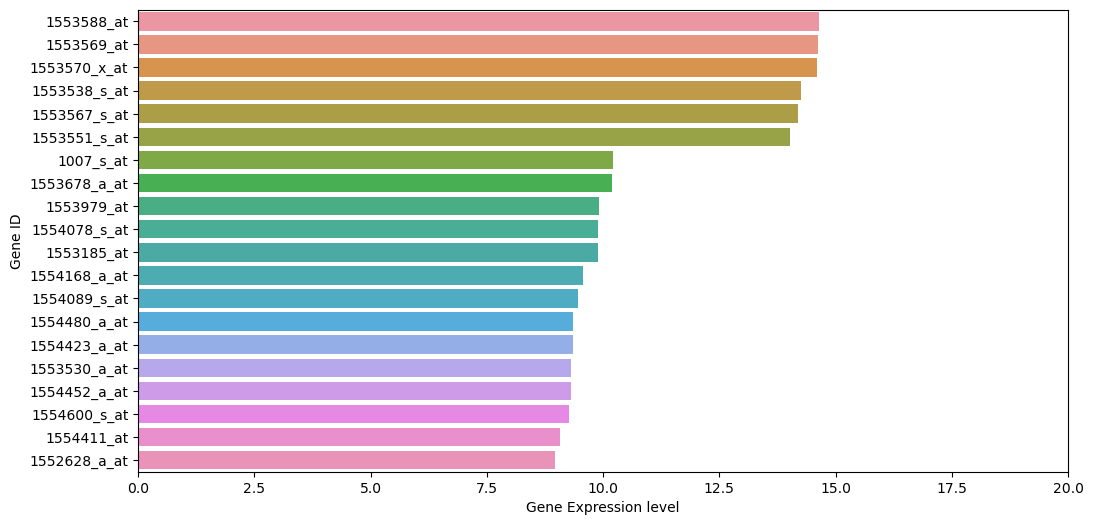

In [16]:
# Sort the mean values and display the top 20 highest mean values
mean_values = df_GeneEx.describe().loc[['mean']]
sorted_mean_values = mean_values.sort_values(by='mean', axis=1, ascending=False)
print(sorted_mean_values.iloc[:, :20])

#plotting
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=sorted_mean_values.iloc[:,:20], orient='h')
ax.set_xlabel('Gene Expression level')
ax.set_ylabel('Gene ID')
ax.set_xlim(0,20)

In [17]:
#Sort the maximum values and display the 20 highest maximum values
max_values = df_GeneEx.describe().loc[['max']]
sorted_max_values = max_values.sort_values(by='max', axis=1, ascending=False)
print(sorted_max_values.iloc[:, :20])

     1553588_at  1553569_at  1553570_x_at  1553538_s_at  1553567_s_at  \
max   14.857448   14.833722     14.816895     14.609346     14.599815   

     1553551_s_at  1554436_a_at  1553970_s_at  1553589_a_at  1553185_at  \
max      14.53452     13.875878     12.357508     11.938424   11.878698   

     213418_at  1552309_a_at  1553979_at  1554600_s_at  1554452_a_at  \
max  11.694707     11.480428   11.359355     11.354919      11.30031   

     1554679_a_at  1554168_a_at  1553678_a_at  1554078_s_at  1007_s_at  
max      11.23167     11.118869     11.102891     11.009175  10.996956  


      1554504_at  1554506_x_at  1553266_at  1554700_at  1553260_s_at  \
mean    2.486792      2.522489    2.524253    2.526473      2.527484   

      1552904_at  1553625_at  1552974_at  1553261_x_at  1553441_at  \
mean     2.53127    2.534981    2.544705      2.546978    2.548114   

      1554820_at  1554133_at  1554507_at  1552379_at  1552987_a_at  \
mean     2.54852     2.55071    2.556754    2.562697      2.562996   

      1554354_at  1554298_a_at  1553362_at  1552480_s_at  1553868_a_at  
mean    2.563272      2.565629     2.56631      2.566349      2.567271  


(0.0, 20.0)

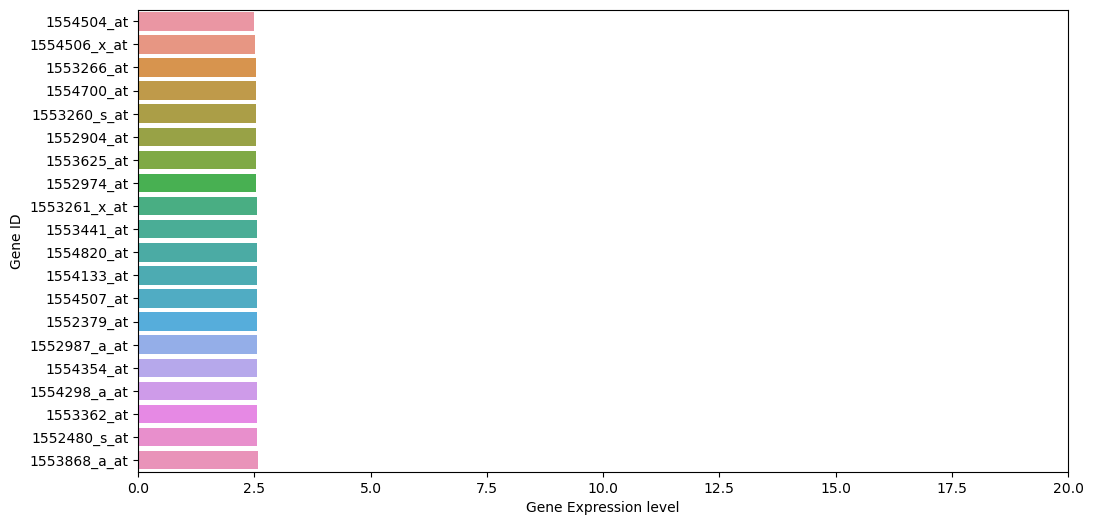

In [18]:
# Sort the mean values and display the  20 lowest mean values
mean_values = df_GeneEx.describe().loc[['mean']]
sorted_mean_values = mean_values.sort_values(by='mean', axis=1, ascending=True)
print(sorted_mean_values.iloc[:, :20])

#plotting
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=sorted_mean_values.iloc[:,:20], orient='h')
ax.set_xlabel('Gene Expression level')
ax.set_ylabel('Gene ID')
ax.set_xlim(0,20)

In [19]:
#Sort the minimum values and display the 20 lowest minimum values
min_values = df_GeneEx.describe().loc[['min']]
sorted_min_values = min_values.sort_values(by='min', axis=1, ascending=True)
print(sorted_min_values.iloc[:, :20])

     1553599_a_at  1553266_at  1552766_at  1554504_at  1553441_at  1552691_at  \
min      2.232684    2.238895     2.25043    2.261776    2.262537    2.273657   

     1552975_x_at  1554133_at  1554235_at  1553261_x_at  1554700_at  \
min      2.275843    2.280025    2.281644      2.283657    2.284116   

     1552904_at  1552837_at  1553765_a_at  1552572_a_at  1553075_a_at  \
min     2.28439    2.285581      2.288401      2.290489      2.291274   

     1554506_x_at  1552379_at  1552826_at  1552661_at  
min      2.293526    2.295562    2.298118    2.301325  


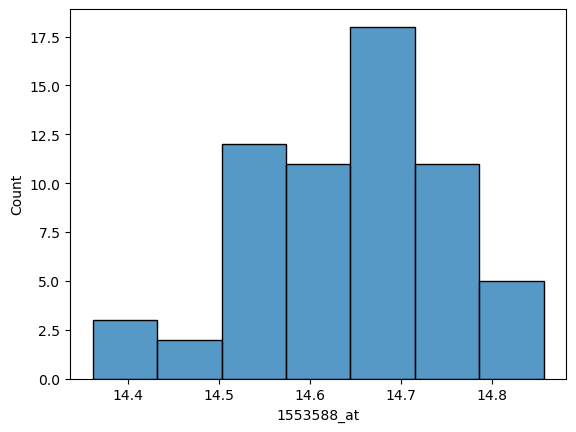

In [20]:
#visual inspection for normal distribution
#Histogram of the distribition of gene expression level of 1553588_at
sns.histplot(data=df_GeneEx, x='1553588_at')
plt.show()

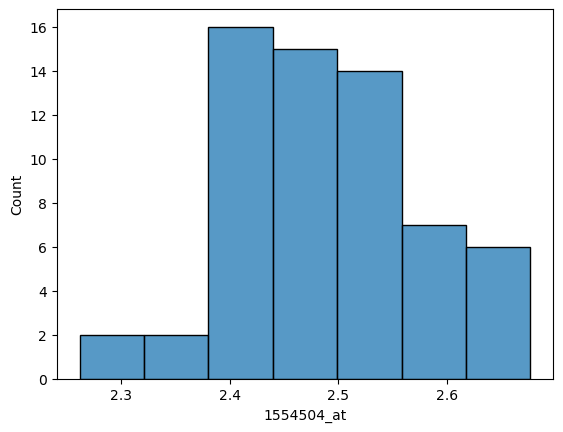

In [21]:
#visual inspection for normal distribution
#Histogram of the distribition of gene expression level of 1554504_at
sns.histplot(data=df_GeneEx, x='1554504_at')
plt.show()

In [36]:
#the Shapiro-Wilk test to check for normal distribution

from normalityTest_Shapiro import normalityTest_Shapiro

data = df_GeneEx['1553588_at']
normalityTest_Shapiro(data)

Data looks normally distributed (fail to reject H0)


In [37]:
data = df_GeneEx['1554504_at']
normalityTest_Shapiro (data)

Data looks normally distributed (fail to reject H0)
